# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install nlputils

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [5]:
import re
import nltk
import string
import nlputils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Reading training dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
data = pd.read_csv("train.csv")
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
157440,de30475fa3b816e4,"""No one has """"forced"""" you to be the small per...",0,0,0,0,0,0
135419,d443f302356dd2fe,"Racist\n\nYall racist man, yall don't let us d...",1,0,0,0,0,0
7857,14eb1cad5ca821e4,"""\n\nPlease fix this line on ron Paul """"Paul's...",0,0,0,0,0,0
111595,550499a74d63aea4,Strikethrough? \nWhy the heck do the past sta...,0,0,0,0,0,0
10602,1bfc680cea38288a,"1,836 views - wow! I wonder what triggered all...",0,0,0,0,0,0


# Exploratory data analysis

In [9]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
data['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [11]:
df = pd.DataFrame(data)

In [12]:
sentencetype_graph=df.iloc[:,2:].sum()

In [13]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

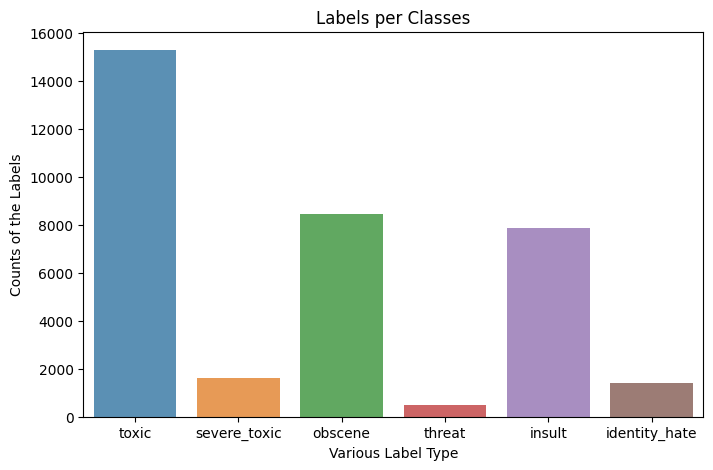

In [14]:
import seaborn as sns
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = data[labels].values
import matplotlib.pyplot as plt
val_counts = data[labels].sum()
plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")
rects = ax.patches
labels = val_counts.values
plt.show()

In [15]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

# Pre-processing

In [16]:
import re
import string

In [17]:
# Removing special characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [18]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

In [41]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]

In [42]:
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]

In [43]:
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]

In [44]:
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]

In [45]:
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]

In [19]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [20]:
def wordcloud(df, label):

    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)


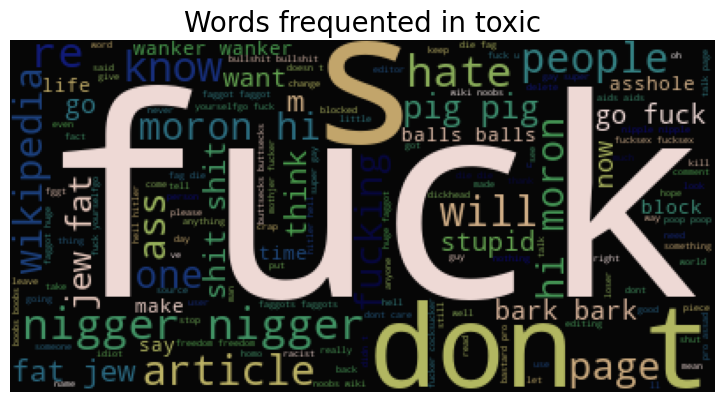

In [21]:
wordcloud(Toxic_comment_df,'toxic')

In [22]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]


In [23]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]


In [24]:
Toxic_comment_balanced_1.shape

(5000, 3)

In [25]:
Toxic_comment_balanced_0.shape

(5000, 3)

In [26]:
Toxic_comment_balanced_1['toxic'].value_counts()

toxic
1    5000
Name: count, dtype: int64

In [27]:
Toxic_comment_balanced_0['toxic'].value_counts()

toxic
0    5000
Name: count, dtype: int64

In [28]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])


In [29]:
Toxic_comment_balanced

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
...,...,...,...
5544,0ece9249484eddb9,electronic intifada is not an activist site w...,0
5545,0ece971b58a3def7,new genre the new genre supernatural was use...,0
5547,0ecf7cde3391615b,translated as the second vatican council a ...,0
5549,0ed11396420e8531,purpose this rfc will be used to determine com...,0


In [30]:
Toxic_comment_balanced['toxic'].value_counts()

toxic
1    5000
0    5000
Name: count, dtype: int64

In [46]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]
Severe_toxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])
Severe_toxic_comment_balanced['severe_toxic'].value_counts()

severe_toxic
1    1595
0    1595
Name: count, dtype: int64

In [47]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])
Obscene_comment_balanced['obscene'].value_counts()

obscene
1    5000
0    5000
Name: count, dtype: int64

In [48]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])
Threatening_comment_balanced['threat'].value_counts()

threat
1    478
0    478
Name: count, dtype: int64

In [49]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])
Insulting_comment_balanced['insult'].value_counts()

insult
1    5000
0    5000
Name: count, dtype: int64

In [50]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])
IdentityHate_comment_balanced['identity_hate'].value_counts()

identity_hate
1    1405
0    1405
Name: count, dtype: int64

# Machine model implementation

In [31]:
from sklearn.metrics import f1_score, 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [32]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]

    # Split our data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    # Using vectorizer and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')

    # Transforming x-train and x-test
    X_train_cv1 = cv1.fit_transform(X_train)
    X_test_cv1  = cv1.transform(X_test)

    ## Machine learning models

    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)

    ## k-nearest neighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)

    ## Multinomial naive bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)

    ## Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    ## Random Forest
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)

    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test),
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]}
    accuracy_score_data = {'Accuracy Score':[accuracy_score(lr.predict(X_test_cv1), y_test), accuracy_score(knn.predict(X_test_cv1), y_test),
                                accuracy_score(bnb.predict(X_test_cv1), y_test), accuracy_score(mnb.predict(X_test_cv1), y_test),
                                accuracy_score(svm_model.predict(X_test_cv1), y_test), accuracy_score(randomforest.predict(X_test_cv1), y_test)]}
    ## Saving f1 score results into a dataframe
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
    df_f2 = pd.DataFrame(accuracy_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
    df_f=pd.concat([df_f1,df_f2],axis=1)

    return df_f

In [52]:
toxic_comment_cv = cv_tf_train_test(Toxic_comment_balanced, 'toxic', TfidfVectorizer, (1,1))
toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(toxic)',
                                'Accuracy Score': 'Accuracy Score(toxic)'}, inplace=True)
toxic_comment_cv

,F1 Score(toxic),Accuracy Score(toxic)
Log Regression,0.866115,0.870667
KNN,0.133333,0.536333
BernoulliNB,0.757700,0.703667
MultinomialNB,0.873096,0.875000
SVM,0.869565,0.873000
Random Forest,0.836705,0.849333


In [53]:
severe_toxic_comment_cv = cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)',
                                'Accuracy Score': 'Accuracy Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic),Accuracy Score(severe_toxic)
Log Regression,0.940282,0.942529
KNN,0.861407,0.864159
BernoulliNB,0.790738,0.745037
MultinomialNB,0.932377,0.931034
SVM,0.937901,0.939394
Random Forest,0.941176,0.942529


In [54]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)',
                                'Accuracy Score': 'Accuracy Score(obscene)'}, inplace=True)
obscene_comment_cv

,F1 Score(obscene),Accuracy Score(obscene)
Log Regression,0.901183,0.905333
KNN,0.677724,0.533667
BernoulliNB,0.766640,0.713667
MultinomialNB,0.887496,0.886333
SVM,0.915613,0.917667
Random Forest,0.884261,0.887000


In [55]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)',
                                'Accuracy Score': 'Accuracy Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat),Accuracy Score(threat)
Log Regression,0.897338,0.905923
KNN,0.852459,0.843206
BernoulliNB,0.745205,0.675958
MultinomialNB,0.902098,0.902439
SVM,0.894737,0.902439
Random Forest,0.923077,0.926829


In [56]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)',
                                'Accuracy Score': 'Accuracy Score(insult)'}, inplace=True)
insult_comment_cv

,F1 Score(insult),Accuracy Score(insult)
Log Regression,0.901851,0.906333
KNN,0.382755,0.608667
BernoulliNB,0.776986,0.728667
MultinomialNB,0.896299,0.896333
SVM,0.906218,0.909000
Random Forest,0.890821,0.895333


In [57]:
identity_hate_comment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hate_comment_cv.rename(columns={'F1 Score': 'F1 Score(indentity_hate)',
                                'Accuracy Score': 'Accuracy Score(indentity_hate)'}, inplace=True)
identity_hate_comment_cv

,F1 Score(indentity_hate),Accuracy Score(indentity_hate)
Log Regression,0.905707,0.909846
KNN,0.820046,0.812574
BernoulliNB,0.776699,0.727165
MultinomialNB,0.903302,0.902728
SVM,0.896806,0.900356
Random Forest,0.888087,0.889680


In [34]:
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_fit, y_train)

mnb.fit(X_train_fit, y_train)
mnb.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
round(accuracy_score(mnb.predict(X_test_fit),y_test)*100,2)

87.57

In [36]:
confusion_matrix(mnb.predict(X_test_fit),y_test)

array([[1322,  232],
       [ 141, 1305]], dtype=int64)

In [37]:
comment1 = ['Go kill yourself']
comment1_vect = tfv.transform(comment1)
mnb.predict_proba(comment1_vect)[:,1]

array([0.92747292])

In [38]:
comment2 = ['hello you are stupid']
comment2_vect = tfv.transform(comment2)
mnb.predict_proba(comment2_vect)[:,1]

array([0.82322751])

In [39]:
#import pickle
#pickle.dump(tfv,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model.pkl','wb'))

In [40]:
""""
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('classifier',MultinomialNB())
])

param_grid={
    'vectorizer__ngram_range':[(1,1),(1,2),(2,2)],
    'classifier__alpha':[0.01,0.1,1,10]
}

grid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_
print(best_params)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
"""

'"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nX = Toxic_comment_balanced.comment_text\ny = Toxic_comment_balanced[\'toxic\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\npipeline=Pipeline([\n    (\'vectorizer\',TfidfVectorizer()),\n    (\'classifier\',MultinomialNB())\n])\n\nparam_grid={\n    \'vectorizer__ngram_range\':[(1,1),(1,2),(2,2)],\n    \'classifier__alpha\':[0.01,0.1,1,10]\n}\n\ngrid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring=\'accuracy\',n_jobs=-1)\ngrid_search.fit(X_train,y_train)\nbest_params=grid_search.best_params_\nprint(best_params)\nbest_model=grid_search.best_estimator_\ny_pred=best_model.predict(X_test)\naccuracy=accuracy_score(y_test,y_pred)\nprint(accuracy*100)\n'